In [2]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import exposure
from skimage.exposure import cumulative_distribution


In [4]:
imgCv = cv2.imread("pic.jpg")
imgPlt = plt.imread("pic.jpg")

**3.1 : Image Pixel Adjustment (gamma)**

In [16]:
im = imgCv
fps = 10

a = 1.0
b = 0

Frame = []

for i in range(30):
    gamma = 0.1+(0.1*i)
    im_test = np.zeros((538,1024,3), dtype='uint8')
    im_test[:,:] = (a*(((im[:,:]/255)**gamma)+b))*255
    Frame.append(im_test)

file_path = 'act3_1.mp4'
fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
writer = cv2.VideoWriter(file_path, fourcc, fps, (1024, 538))

for frame in Frame:
    writer.write(frame)
    
for frame in reversed(Frame):
    writer.write(frame)

writer.release()
print("Finished")


Finished


**3.2 Image Histogram Equalization**

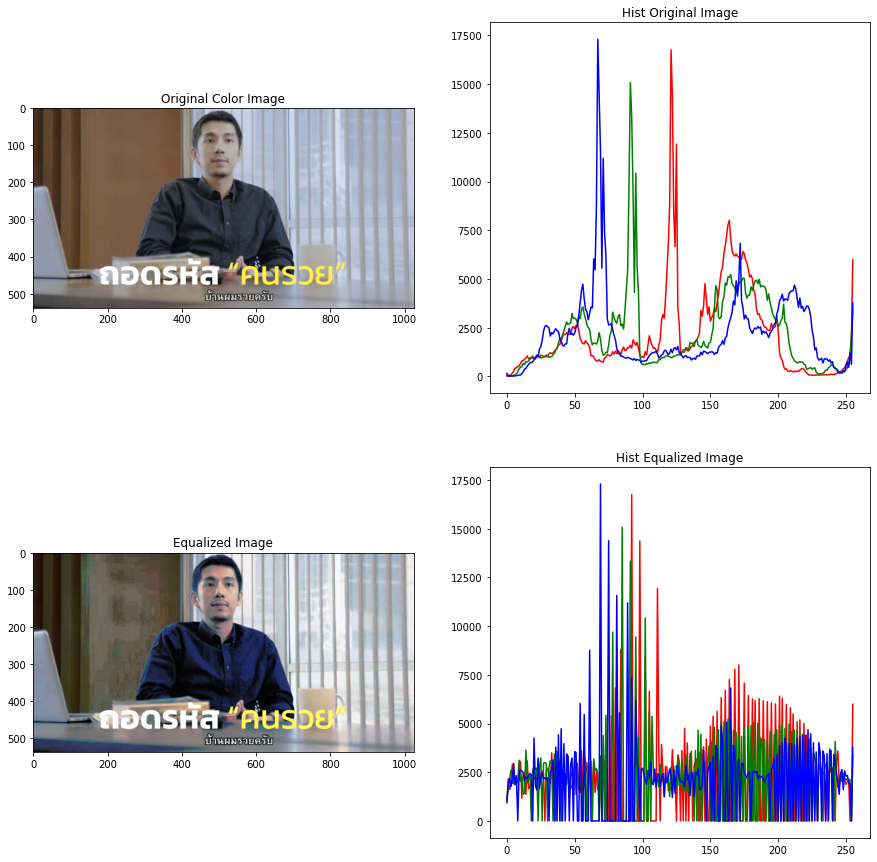

In [6]:
img_ori = cv2.cvtColor(imgCv, cv2.COLOR_BGR2RGB)

img_eqa = cv2.cvtColor(imgCv, cv2.COLOR_BGR2RGB)

img_eqa[:,:,0] = cv2.equalizeHist(img_ori[:,:,0])
img_eqa[:,:,1] = cv2.equalizeHist(img_ori[:,:,1])
img_eqa[:,:,2] = cv2.equalizeHist(img_ori[:,:,2])

f, axarr = plt.subplots(2,2)

f.set_figheight(15)
f.set_figwidth(15)
f.set_facecolor("white")

axarr[0,0].title.set_text("Original Color Image")
axarr[0,0].imshow(img_ori)

histr_r = cv2.calcHist([img_ori],[0],None,[256],[0,256])
histr_g = cv2.calcHist([img_ori],[1],None,[256],[0,256])
histr_b = cv2.calcHist([img_ori],[2],None,[256],[0,256])

axarr[0,1].title.set_text("Hist Original Image")
axarr[0,1].plot(histr_r, color = 'r')
axarr[0,1].plot(histr_g, color = 'g')
axarr[0,1].plot(histr_b, color = 'b')

axarr[1,0].title.set_text("Equalized Image")
axarr[1,0].imshow(img_eqa)

histr_eqa_r = cv2.calcHist([img_eqa],[0],None,[256],[0,256])
histr_eqa_g = cv2.calcHist([img_eqa],[1],None,[256],[0,256])
histr_eqa_b = cv2.calcHist([img_eqa],[2],None,[256],[0,256])

axarr[1,1].title.set_text("Hist Equalized Image")
axarr[1,1].plot(histr_eqa_r, color = 'r')
axarr[1,1].plot(histr_eqa_g, color = 'g')
axarr[1,1].plot(histr_eqa_b, color = 'b')

plt.savefig('act3_2.png', facecolor=f.get_facecolor(), transparent=True)

**3.3 Image Histogram Equalization**

In [9]:
def cdf(im):
    c, b = cumulative_distribution(im)

    for i in range(b[0]):
        c = np.insert(c, 0, 0)
    for i in range(b[-1]+1, 256):
        c = np.append(c, 1)
    return c

def hist_matching(c, c_t, im):
    b = np.interp(c, c_t, np.arange(256))
    pix_repl = {i:b[i] for i in range(256)}
    mp = np.arange(0, 256)
    for (k, v) in pix_repl.items():
        mp[k] = v
    s = im.shape
    im = np.reshape(mp[im.ravel()], im.shape)
    im = np.reshape(im, s)
    return im

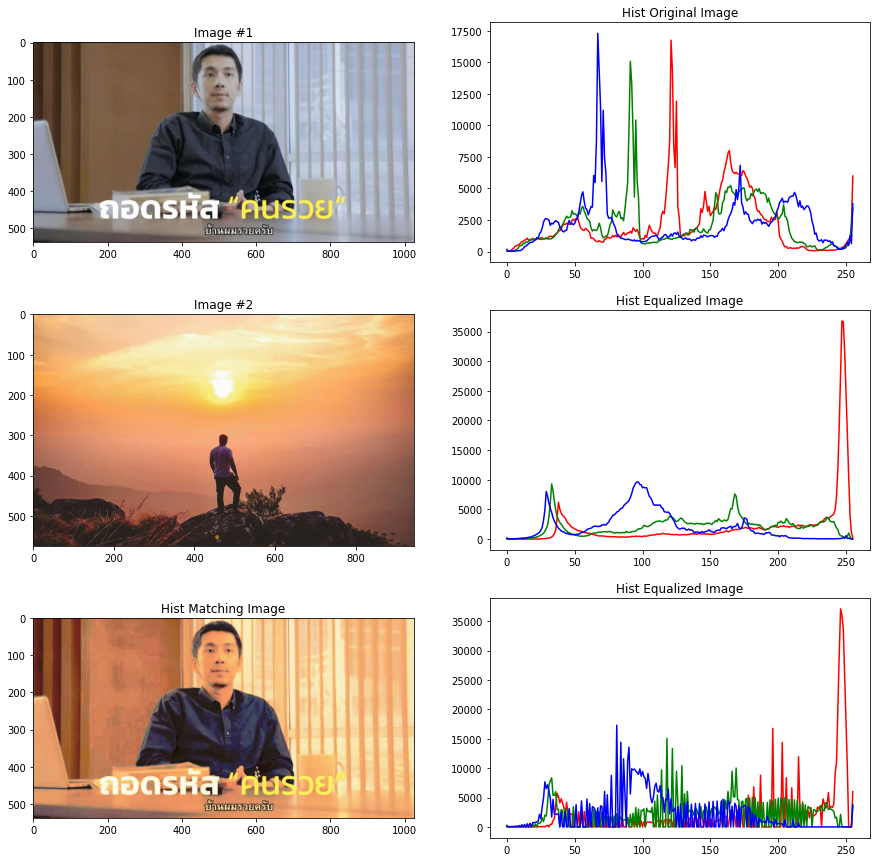

In [15]:
imgMatch = cv2.imread("pic_match.jpg")

img_ori = cv2.cvtColor(imgCv, cv2.COLOR_BGR2RGB)
img_mat = cv2.cvtColor(imgMatch, cv2.COLOR_BGR2RGB)

im_result = cv2.cvtColor(img_ori, cv2.COLOR_BGR2RGB)

cdf_im1_R = cdf(img_ori[:,:,0])
cdf_im2_R = cdf(img_mat[:,:,0])

cdf_im1_G = cdf(img_ori[:,:,1])
cdf_im2_G = cdf(img_mat[:,:,1])

cdf_im1_B = cdf(img_ori[:,:,2])
cdf_im2_B = cdf(img_mat[:,:,2])

im_result[:,:,0] = hist_matching(cdf_im1_R, cdf_im2_R, img_ori[:,:,0])
im_result[:,:,1] = hist_matching(cdf_im1_G, cdf_im2_G, img_ori[:,:,1])
im_result[:,:,2] = hist_matching(cdf_im1_B, cdf_im2_B, img_ori[:,:,2])

hist1 = cv2.calcHist([img_ori[:,:, 0]], [0], None, [256], [0, 256])
hist11 = cv2.calcHist([img_ori[:,:, 1]], [0], None, [256], [0, 256])
hist111 = cv2.calcHist([img_ori[:,:, 2]], [0], None, [256], [0, 256])

hist2 = cv2.calcHist([img_mat[:,:,0]], [0], None, [256], [0, 256])
hist22 = cv2.calcHist([img_mat[:,:,1]], [0], None, [256], [0, 256])
hist222 = cv2.calcHist([img_mat[:,:,2]], [0], None, [256], [0, 256])

hist_result0 = cv2.calcHist([im_result[:,:,0]], [0], None, [256], [0, 256])
hist_result1 = cv2.calcHist([im_result[:,:,1]], [0], None, [256], [0, 256])
hist_result2 = cv2.calcHist([im_result[:,:,2]], [0], None, [256], [0, 256])

f, ax = plt.subplots(3, 2)
f.set_figheight(15)
f.set_figwidth(15)
f.set_facecolor("white")

ax[0, 0].imshow(img_ori)
ax[0, 1].plot(hist1, color = 'r')
ax[0, 1].plot(hist11, color = 'g')
ax[0, 1].plot(hist111, color = 'b')
ax[0, 0].set_title('Image #1')
ax[0, 1].set_title('Hist Original Image')

ax[1, 0].imshow(img_mat)
ax[1, 1].plot(hist2, color = 'r')
ax[1, 1].plot(hist22, color = 'g')
ax[1, 1].plot(hist222, color = 'b')
ax[1, 0].set_title('Image #2')
ax[1, 1].set_title('Hist Equalized Image')

ax[2, 0].imshow(im_result)
ax[2, 1].plot(hist_result0, color = 'r')
ax[2, 1].plot(hist_result1, color = 'g')
ax[2, 1].plot(hist_result2, color = 'b')
ax[2, 0].set_title('Hist Matching Image')
ax[2, 1].set_title('Hist Equalized Image')

plt.savefig('act3_3.png', facecolor=f.get_facecolor(), transparent=True)
